In [3]:
import numpy as np
import math 
import pylab
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm, colors
import random

In [4]:
class Protein(object):
    def __init__(self, sequence, conformation):
        self.sequence = sequence
        self.conformation = conformation
        
    def count_proteins_contacts(self):
        """Для данного белка считает число топологических контактов HH."""
        hh=0
        steps = [(1, 0), (-1, 0), (0, 1),  (0, -1)]
        for i in range(1, len(self.conformation)-1):
            not_topological=[self.conformation [i-1], self.conformation[i+1]]
            for step in steps:
                new_point = (self.conformation[i][0]+step[0], self.conformation [i][1]+step[1] )
                if (new_point in self.conformation  and (new_point not in not_topological)):
                    position = self.conformation.index(new_point)
                    if( self.sequence[position]==1 and self.sequence[i]==1 ):
                        hh=hh+1
        for step in steps:
            new_point_begin = (self.conformation[0][0]+step[0], self.conformation[0][1]+step[1] )
            new_point_end= ( self.conformation[-1][0]+step[0], self.conformation [-1][1]+step[1])
            if(new_point_begin in self.conformation  and new_point_begin!=self.conformation [1]):
                position = self.conformation.index(new_point_begin)
                if( self.sequence[position]==1 and self.sequence[0]==1 ):
                    hh=hh+1
            if( new_point_end in self.conformation  and new_point_end!=self.conformation[-2]):
                position = self.conformation.index(new_point_end) 
                if( self.sequence[position]==1 and self.sequence[-1]==1 ):
                    hh=hh+1
        return hh//2
     

In [5]:
L_min=2
L_max=12
steps = [(1, 0), (-1, 0), (0, 1),  (0, -1)]

In [6]:
one_over_lengths=0
lengths=range(L_min, L_max+1)

for i in lengths:
    one_over_lengths=one_over_lengths+1/i

k=1/one_over_lengths


probabilities = []
for i in lengths:
    probabilities.append(k/i)
    
print(probabilities)
print(sum(probabilities))

[0.23773177132467707, 0.1584878475497847, 0.11886588566233854, 0.09509270852987083, 0.07924392377489235, 0.06792336323562202, 0.05943294283116927, 0.052829282516594904, 0.04754635426493541, 0.04322395842266856, 0.039621961887446176]
0.9999999999999998


In [7]:
st='HHPHPHPHPHHHHPHPPPHPPPHPPPPHPPPHPPPHPHHHHPHPHPHPHH'
length = len(st)
sequence_example=[]
for c in st:
    if c=='H':
        sequence_example.append(1)
    else:
        sequence_example.append(0)
print(sequence_example)
print(len(sequence_example))

[1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1]
50


In [8]:
T = 2.5 #температура фиксирована 
n_interations = 100 #пока фиксирую число итераций так 


In [170]:
start_conformation = [(0, 0)]
for i in range(1,50):
    if (i%8>0 and i%8<4):
        new_coordinate = (start_conformation[-1][0],start_conformation[-1][1]+1)
    elif (i%8>4 and i%8<=7):
        new_coordinate = (start_conformation[-1][0],start_conformation[-1][1]-1)
    else:
        new_coordinate = (start_conformation[-1][0]+1,start_conformation[-1][1])
    start_conformation.append(new_coordinate)
print(start_conformation)
print(len(start_conformation))

[(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (1, 2), (1, 1), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (3, 2), (3, 1), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (5, 3), (5, 2), (5, 1), (5, 0), (6, 0), (6, 1), (6, 2), (6, 3), (7, 3), (7, 2), (7, 1), (7, 0), (8, 0), (8, 1), (8, 2), (8, 3), (9, 3), (9, 2), (9, 1), (9, 0), (10, 0), (10, 1), (10, 2), (10, 3), (11, 3), (11, 2), (11, 1), (11, 0), (12, 0), (12, 1)]
50


In [171]:
xplot = []
yplot = []
for i in start_conformation:
    xplot.append(i[0])
    yplot.append(i[1]+4)
markers = list(matplotlib.lines.Line2D.markers)

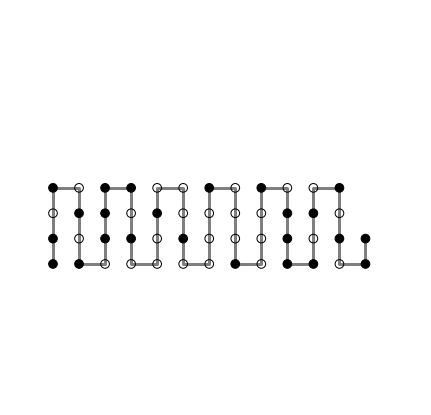

In [172]:
plt.figure(figsize=(7,7 ))

plt.plot(xplot, yplot, '-', color = 'k', lw=3,markersize=9,alpha=0.5)

plt.scatter(xplot, yplot, c=sequence_example, s=75, edgecolors='k',  cmap='Greys', alpha = 1)

plt.xlim(-1, 14)
plt.ylim(-1,14)

plt.axis('off')

plt.grid(True)

это начальная конформация. 

In [12]:
p = Protein(sequence_example, start_conformation)
q = p.count_proteins_contacts()
print(q)

5


In [13]:
def D(point1, point2):
    "Это расстояние по норме р1."
    return abs(point2[0]-point1[0]) + abs(point2[1]-point1[1])

# Attempt to implement FRESS


In [177]:
current_conf = start_conformation.copy()
tobreak=False 
for iteration in range(1000):
    #print(iteration, end=" ")
    l = np.random.choice(lengths, 1, p=probabilities)[0] #selected l 
    print(l)
    end = length-l#for e+1
    start_position = random.randint(0,end-1)
    print(start_position)
    end_position = start_position+l-1

    C_t= current_conf[:start_position]+current_conf[end_position+1:]
    print("len", len(C_t))
    Seq_t=sequence_example[:start_position]+sequence_example[end_position+1:]
    
    
    #print(C_t)
    
    p=Protein(Seq_t, C_t)
    E_t=p.count_proteins_contacts()
    #print("E_t : ", E_t)
    
    #first move 
    first_moves=[]
    
    for step in steps:
        point = (C_t[start_position-1][0]+step[0], C_t[start_position-1][1]+step[1])
        
        if (point == current_conf[start_position]):
            continue
        if ((point not in C_t )and D(point, current_conf[end_position+1])<=abs(end_position+1-start_position)):
            first_moves.append(point)
            
    
    #print("first moves : ", first_moves)
    if(len(first_moves)==0):
        continue
    else:
        ind=[]
        for q in range(len(first_moves)):
            ind.append(q)
        
        first_move=first_moves[np.random.choice(ind, 1)[0]]
        C_t_j = current_conf[:start_position]+[first_move]+current_conf[end_position+1:]
        Seq_t_j=sequence_example[:start_position]+[sequence_example[start_position]]+sequence_example[end_position+1:]
        pnew = Protein(Seq_t_j ,C_t_j)
        Enew = pnew.count_proteins_contacts()
        acceptance_probability =min(1, math.exp(-(Enew-E_t)/T) )
            
        p_t_j =np.random.choice([0, 1], 1, p=[acceptance_probability, 1-acceptance_probability])[0]
            # 0 - accept, 1 - not
            
        if(p_t_j)==0:
            C_t=C_t_j.copy()
            Seq_t=Seq_t_j.copy()
            
        else: 
            continue
            
        
        for t in range(start_position+1, end_position+1):
           
            moves = [] 
            for step in steps:
                point = (C_t[t-1][0]+step[0], C_t[t-1][1]+step[1])
                if ((point not in C_t )and D(point, current_conf[end_position+1])<=abs(end_position+1-t)):
                    moves.append(point)
                    
            if(len(moves)==0):
                #print("we did not find place")
                break 
            else: 
                ind=[]
                for q in range(len(moves)):
                    ind.append(q)
               
                move=moves[np.random.choice(ind, 1)[0]]
                C_t_j =  C_t[:t]+[move]+current_conf[end_position+1:]
                
                Seq_t_j=sequence_example[:t]+[sequence_example[t]]+sequence_example[end_position+1:]
                pnew = Protein(Seq_t_j ,C_t_j)
                Enew = pnew.count_proteins_contacts()
                acceptance_probability =min(1, math.exp(-(Enew-E_t)/T) ) #I ignore it now 
                C_t=C_t_j.copy()
                Seq_t=Seq_t_j.copy()
                        
             # too weak acceptance and chances to regrow???        
           
        
                
        
            

            #print("E Enew ", E_t, Enew)
            #print("probability ", acceptance_probability)
            
            
            
            
                
    if(len(C_t)==length):
        current_conf=C_t.copy()

    continue    
        
    
    
    #for residue in range(l):
        
    
    

5
27
len 45
9
29
len 41
8
9
len 42
8
12
len 42
4
31
len 46
4
19
len 46
3
21
len 47
9
10
len 41
3
42
len 47
3
11
len 47
2
13
len 48
5
43
len 45
9
12
len 41
2
26
len 48
6
27
len 44
5
1
len 45
3
0
len 47
4
40
len 46
9
31
len 41
6
19
len 44
2
21
len 48
7
14
len 43
5
7
len 45
4
32
len 46
10
33
len 40
2
16
len 48
2
5
len 48
3
45
len 47
3
12
len 47
3
2
len 47
5
20
len 45
2
18
len 48
3
38
len 47
7
8
len 43
2
43
len 48
2
42
len 48
3
21
len 47
10
14
len 40
2
7
len 48
8
3
len 42
3
36
len 47
2
16
len 48
3
40
len 47
8
5
len 42
4
15
len 46
4
6
len 46
3
20
len 47
12
7
len 38
6
23
len 44
4
3
len 46
2
47
len 48
2
5
len 48
5
37
len 45
2
34
len 48
3
36
len 47
2
12
len 48
2
29
len 48
2
0
len 48
2
35
len 48
8
34
len 42
3
27
len 47
2
20
len 48
7
27
len 43
12
28
len 38
8
7
len 42
7
10
len 43
7
3
len 43
2
32
len 48
11
24
len 39
5
41
len 45
10
35
len 40
5
3
len 45
5
9
len 45
8
8
len 42
5
25
len 45
6
16
len 44
3
12
len 47
2
7
len 48
2
6
len 48
6
42
len 44
2
40
len 48
5
41
len 45
2
19
len 48
4
23
len 46
3
45
len

len 39
3
46
len 47
9
40
len 41
10
19
len 40
2
2
len 48
4
38
len 46
2
34
len 48
2
32
len 48
4
17
len 46
8
16
len 42
11
21
len 39
2
42
len 48
5
8
len 45
2
3
len 48
8
15
len 42
9
9
len 41
5
4
len 45
10
9
len 40
4
29
len 46
2
36
len 48
2
24
len 48
8
28
len 42
11
33
len 39
4
19
len 46
3
29
len 47
2
18
len 48
2
41
len 48
11
5
len 39
2
4
len 48
12
27
len 38
4
35
len 46
2
3
len 48
4
8
len 46
7
26
len 43
9
26
len 41
12
8
len 38
2
35
len 48
2
11
len 48
6
29
len 44
10
35
len 40
6
29
len 44
7
31
len 43
3
46
len 47
5
8
len 45
2
44
len 48
3
6
len 47
9
20
len 41
4
4
len 46
6
38
len 44
3
46
len 47
7
30
len 43
3
34
len 47
5
31
len 45
6
21
len 44
11
16
len 39
4
17
len 46
2
33
len 48
9
17
len 41
5
3
len 45
2
34
len 48
2
10
len 48
11
8
len 39
2
2
len 48
3
19
len 47
8
13
len 42
8
26
len 42
12
11
len 38
3
27
len 47
3
6
len 47
7
5
len 43
6
12
len 44
5
7
len 45
5
4
len 45
11
19
len 39
6
35
len 44
2
30
len 48
2
17
len 48
4
7
len 46
8
9
len 42
6
41
len 44
11
8
len 39
6
9
len 44
2
25
len 48
9
1
len 41
3
1
len 47

50


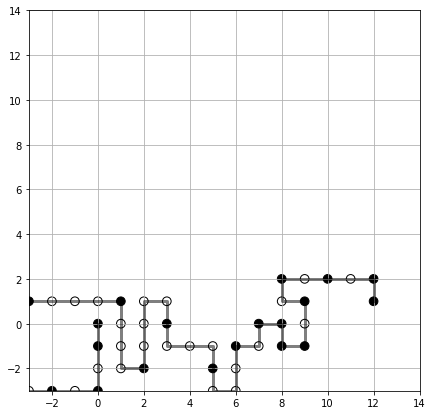

In [178]:
xplot = []
yplot = []
for i in current_conf:
    xplot.append(i[0])
    yplot.append(i[1])
markers = list(matplotlib.lines.Line2D.markers)
print(len(current_conf))
plt.figure(figsize=(7,7 ))

plt.plot(xplot, yplot, '-', color = 'k', lw=3,markersize=9,alpha=0.5)
#plt.plot(first_moves[0][0], first_moves[0][1])
plt.scatter(xplot, yplot,c=sequence_example,  s=75, edgecolors='k',  cmap='Greys', alpha = 1)

plt.xlim(-3, 14)
plt.ylim(-3,14)

plt.grid(True)